# Sklearn 활용 인공지능 적용 방법

1. 데이터 준비
   1. 데이터 로딩
   1. 필요 데이터만 추출 또는 남기기
   1. 데이터 전처리 (데이터 정체) : 수치화, wrong format, 결측치, 이상치
   1. Feature Engineering : 학습에 도움이 되는 feature로 변환 => 학습쪽에 있는 엣지만 디텍팅하는 것도 이쪽 
                                                       (CNN(초기 영상 인식쪽) convolution layer fulling layer)
   1. 학습용, 테스트용 데이터 준비                     (음성인식은 RNN에서 시작 인코딩 디코딩 트랜스포머로 가면서....)
1. 예측 모델 생성 (머신러닝 기반 학습)
   1. 모델 생성
   1. 모델 학습 
   1. 학습 모델 성능 평가 (학습 데이터, 테스트 데이터)

# 1. 데이터 준비하기

* 타이타닉 승객 데이터
  - Survived : 생존 여부(종속 변수) [0 = 사망, 1 = 생존]
  - Pclass : 객실 등급 - 승객의 사회적, 경제적 지위 [1st = Upper, 2nd = Middle, 3rd = Lower]
  - Name : 이름
  - Sex : 성별
  - Age : 나이
  - SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
  - Parch : 동반한 Parent(부모) Child(자식)의 수
  - Ticket : 티켓의 고유넘버
  - Fare : 티켓의 요금
  - Cabin : 객실 번호
  - Embarked : 승선한 항

In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# 데이터 로딩
import pandas as pd
titanic_url='https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic = pd.read_excel(titanic_url, sheet_name='total')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
#분석에 사용되지 않는 데이터 삭제 : 'boat', 'body', 'home.dest'
titanic_df = titanic.drop(['boat', 'body', 'home.dest'], axis=1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


## 1-1. 데이터 전처리

In [4]:
# 데이터 현황 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
#제대로 되는지 확인
x = 'Zabour, Miss. Hileni'
y = x.split(',')[1].split('.')[0].strip()
y

'Miss'

In [6]:
# name : 호칭을 명목 변수화 -> title
# nomial variable(명목 변수) inuemratied
# static const
# #define
# tuple 코딩할때는 0과 1 외의 값이 들어가면 안됨
# 이름에서 .으로 끝나는 부분만 추출한 후 데이터 파악 -> 변환 규칙 정하기
mapping_func = lambda x:x.split(',')[1].split('.')[0].strip()
#한번만 안스고 싶으면 def 쓰면 됨
titanic_df['title'] = titanic_df['name'].map(mapping_func)
# 호칭 통일 ('Ms', 'Mlle' -> Miss, 'Mme' -> 'Mrs', 나머지 -> 'Special')
# _.replace(source, target) ~ source의 경우 string 혹은 list
titanic_df['title'].replace(['Ms', 'Mlle', 'Lady'], 'Miss', inplace=True)
titanic_df['title'].replace(['Mme'], 'Mrs', inplace=True)
titanic_df['title'].replace(['Col', 'Dr', 'Major', 'Capt', 'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev'], 'Special', inplace=True)
# 호칭을 숫자화 : 'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Special':5
mapping_dic = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Special':5}
titanic_df['title'] = titanic_df['title'].map(mapping_dic)
# 필요없는 데이터 삭제(생존에 어떤 영향을 줬는지만 중요하기 때문에...숫자화 해도 암상관 x)
titanic_df['title'].unique()
titanic_df.drop('name', axis=1, inplace=True)
titanic_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,4
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,2
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,1
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,NaN,C,2
1305,3,0,female,NaN,1,0,2665,14.4542,NaN,C,2
1306,3,0,male,26.5000,0,0,2656,7.2250,NaN,C,1
1307,3,0,male,27.0000,0,0,2670,7.2250,NaN,C,1


In [7]:
# sex : 명목 변수화
# 데이터 확인
#titanic_df['sex'].unique()
# 명목 변수화 규칙 ('male':0, 'female':1)
titanic_df['sex'] = titanic_df['sex'].map({'male':0, 'female':1})
titanic_df['sex'].unique()

array([1, 0], dtype=int64)

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  title     1309 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 112.6+ KB


<Axes: ylabel='Frequency'>

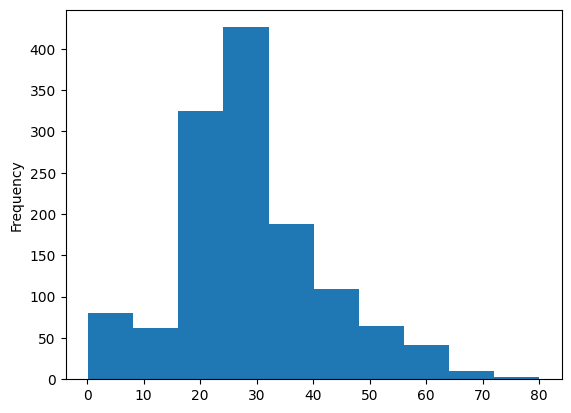

In [9]:
# age : 결측치 처리, 연령대로 명목 변수화
# 데이터 확인 : 범위, 분포 등
# titanic_df['age'].describe()
#age와 상관관계가 높은 feature를 찾아서.....
# titanic_df.plot(kind = 'scatter', x='title', y='age')
# 결측치 처리 ~ title에 각각의 feature에 해당하는 애들의 평균값 또는 중앙값으로 결측치를 채워준다
titanic_df['age'].fillna(titanic_df.groupby('title')['age'].transform('median'), inplace=True) #age에 해당하는 애들중에 non value 가진 애들만 median으로 채워서 바꿔달라는 함수
# titanic_df.info()
# 나이를 범주화하기
titanic_df['age'].plot(kind='hist')

In [10]:
# cut이라는 함수? 7개의 범주로 나누어 달라고 하면 나누어주는 애가 있음
#구간별로 label을 지정해줄 수 있다
titanic_df['age_cat'] = pd.cut(titanic_df['age'], 7, labels=[0, 1, 2, 3, 4, 5, 6])
titanic_df['age_cat'] = titanic_df['age_cat'].astype('i')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  title     1309 non-null   int64  
 11  age_cat   1309 non-null   int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 117.7+ KB


In [11]:
# sibsp, parch : 동반자수(family)와 혼자여행여부(alone)으로 변경
# 동반자수(family) 추가
titanic_df['family'] = titanic_df['sibsp'] + titanic_df['parch']
# 동반자 없으면 1, 있으면 0
titanic_df.loc[titanic_df['family'] == 0, 'alone'] = 1
titanic_df.loc[titanic_df['family'] > 0, 'alone'] = 0
titanic_df['alone'] = titanic_df['alone'].astype('int')
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_cat,family,alone
0,1,1,1,29.0000,0,0,24160,211.3375,B5,S,2,2,0,1
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,S,4,0,3,0
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,S,2,0,3,0
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,3,0
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,S,3,2,3,0


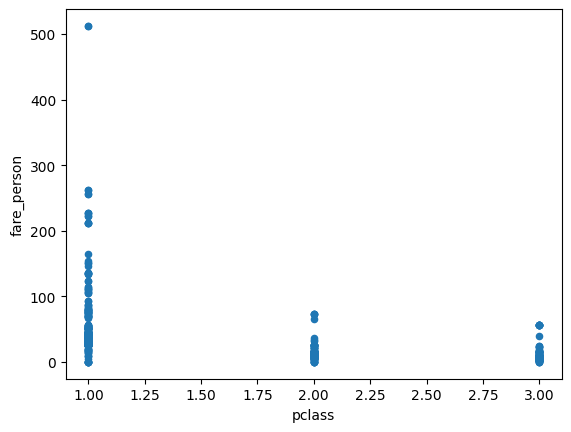

In [13]:
# fare : 개인별 요금 범주화 (fare_person), 결측치 1개 채우기
# 데이터 확인
# 개인별 요금 계산하여 열 추가 : fare_person
titanic_df['fare_person'] = titanic_df['fare']/ (titanic_df['family']+1)#family의 수에 자기를 더하는 것
# 결측치를 채울 값을 찾기 위한 데이터 확인
titanic_df.plot(kind='scatter', x='pclass', y='fare_person')
# 결측치 채우기 요금값의 중간값으로 결측치를 채울 것
titanic_df['fare_person'].fillna(titanic_df.groupby('pclass')['fare_person'].transform('median'),inplace=True)
# 개인별 요금 범주화
# titanic_df.head()
# titanic_df.info()
# titanic_df['fare_person'].describe()
# titanic_df['fare_person'].plot(kind='hist')
titanic_df['fare_person_cat'] = pd.cut(titanic_df['fare_person'], [-1, 10, 20, 50, 100, 520], labels=[0, 1, 2, 3, 4])
titanic_df['fare_person_cat'] = titanic_df['fare_person_cat'].astype(int)
# titanic_df['fare_person_cat'].value_counts() #같은 값을 가진 애들만 찾아서 세는 것

In [14]:
# embarked : 명목 변수화
# 데이터 확인
titanic_df['embarked'].value_counts()
# 결측치 채우기
titanic_df['embarked'].fillna('S', inplace=True)
# 숫자로 범주화'S':0, 'C':1, 'Q':2
titanic_df['embarked'] = titanic_df['embarked'].map({'S':0, 'C':1, 'Q':2})

In [15]:
# 입력 Data set -> X_data, 정답 Data set -> y_data
titanic_df.columns
X_col = ['pclass', 'sex','age_cat', 'family', 'fare_person_cat', 'embarked', 'title']
y_col = 'survived'
X_data = titanic_df[X_col]
y_data = titanic_df[y_col]
X_data.rename(columns={'age_cat':'age', 'fare_person_cat':'fare_person'})

,pclass,sex,age,family,fare_person,embarked,title
0,1,1,2,0,4,0,2
1,1,0,0,3,2,0,4
2,1,1,0,3,2,0,2
3,1,0,2,3,2,0,1
4,1,1,2,3,2,0,3
...,...,...,...,...,...,...,...
1304,3,1,1,1,0,1,2
1305,3,1,1,1,0,1,2
1306,3,0,2,0,0,1,1
1307,3,0,2,0,0,1,1


In [16]:
# 학습용, 테스트용 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=13)
len(X_train)

1047

# 2. 머신러닝 적용

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성

decision_tree = DecisionTreeClassifier()
# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 성능 측정 
train_score_DT = round(decision_tree.score(X_train, y_train)*100, 2)
test_score_DT = round(decision_tree.score(X_test, y_test)*100, 2)
train_score_DT, test_score_DT

(86.63, 80.15)

### 랜덤 포레스트
* Decision Tree를 random하게 여러개 만들어서 모델링 -> 각 Decision Tree의 예측을 사용해 최종 예측 수행
  - n_estimators : Dectsion Tree의 수 (기본 100개)
  - Bootstrap Sampling : 학습 데이터에서 데이터를 중복해서 샘플링하는 방식
  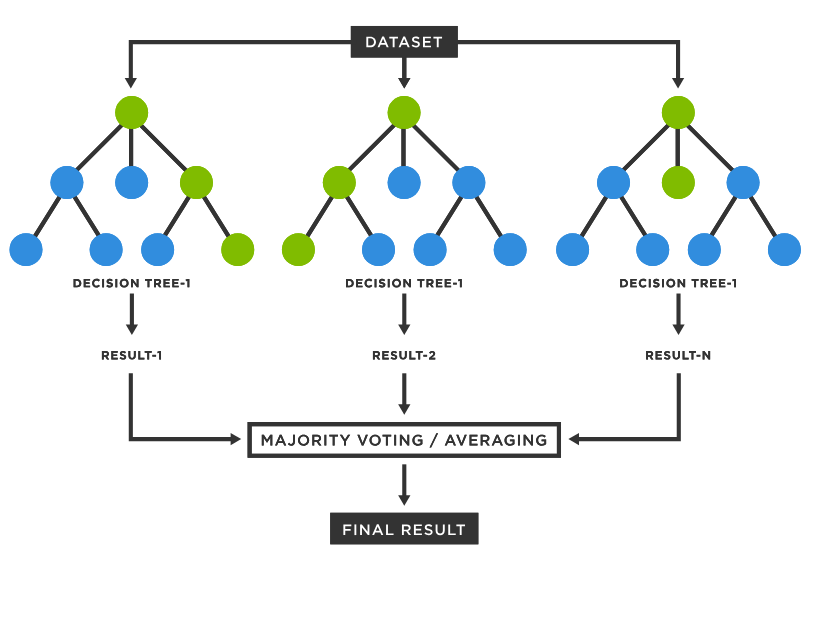

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 모델 생성
random_forrest = RandomForestClassifier(n_estimators=100)
# 모델 학습
random_forrest.fit(X_train, y_train)
# 모델 성능 측정
train_score_RF = round(decision_tree.score(X_train, y_train)*100, 2)
test_score_RF = round(decision_tree.score(X_test, y_test)*100, 2)
train_score_RF, test_score_RF

### 로지스틱 회귀분석

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
# 모델 생성
model = LogisticRegression()
# 모델 학습
model.fit(X_train, y_train)
# 모델 성능 측정
train_score_LR = round(decision_tree.score(X_train, y_train)*100, 2)
test_score_LR = round(decision_tree.score(X_test, y_test)*100, 2)
train_score_LR, test_score_LR

### 나이브 베이지안
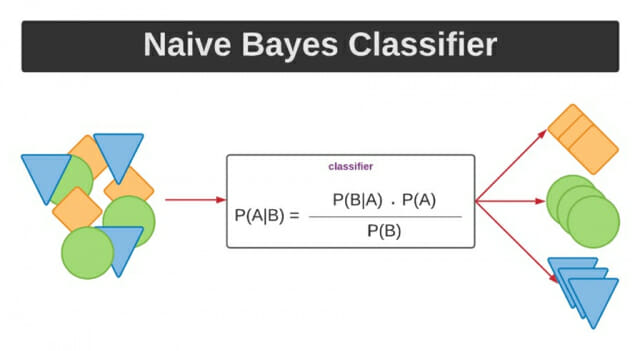
* P(A|B) : 사건 B가 일어났을 때, A 클래스에 속할 확률
* P(A): 사건 A가 일어날 확률
* P(B): 사건 B가 일어날 확률 = 사건 A가 발생하기 전 사건 B가 일어날 확률
* P(B|A) : 클래스 A에서 사건 B가 발생할 확률
* 매우 순진한 가정: 사전 확률을 구성하는 사건은 모두 독립사건이다.
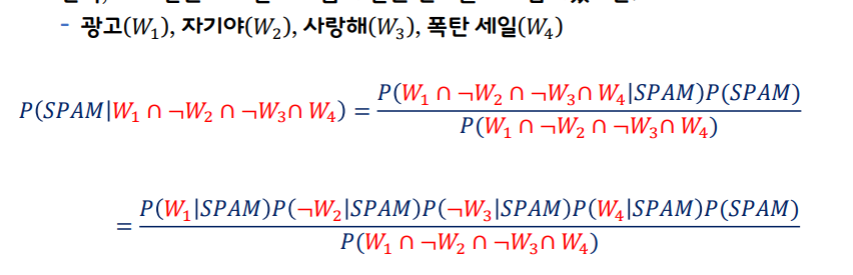

In [18]:
from sklearn.naive_bayes import GaussianNB
# 모델 생성
model = GaussianNB()
# 모델 학습
model.fit(X_train, y_train)
# 모델 성능 측정

train_score_NB = round(model.score(X_train, y_train)*100, 2)
test_score_NB = round(model.score(X_test, y_test)*100, 2)
train_score_NB, test_score_NB

(78.41, 80.92)

### K-Nearest Neighbor (KNN)
* 가장 거리가 가까운 n개의 데이터의 class를 조사하여 가장 많은 수에 해당하는 class로 결정
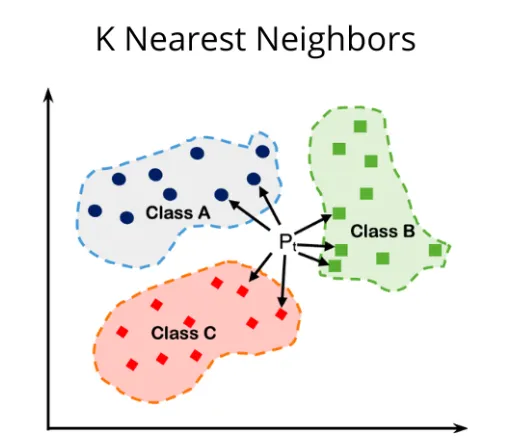

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# 모델 생성
model = KNeighborsClassifier()
# 모델 학습
model.fit(X_train, y_train)
# 모델 성능 평가
train_score_KN = round(model.score(X_train, y_train)*100, 2)
test_score_KN = round(model.score(X_test, y_test)*100, 2)
train_score_KN, test_score_KN

(82.81, 82.82)

### SVM 모델
* (여백 최대화 통계적 분석 기법) 데이터들을 가능한 멀리 두 개의 집단으로 분리시기는 최적의 초평면을 학습하는 알고리즘 
* 마진의 거리가 가장 가까운 애들과 가장 먼 애들을 찾는 것...........? 2차원일때는 선으로 나타내는 것이 불가능한데 차원을 높이면 선을 그을 수 있기 때문에 더 높은 차원으로 옮겨가서 평면으로 자르는 기법이 들어가 있다 예전엔 많이 쓰였음. 딥러닝이 나오기 전에...
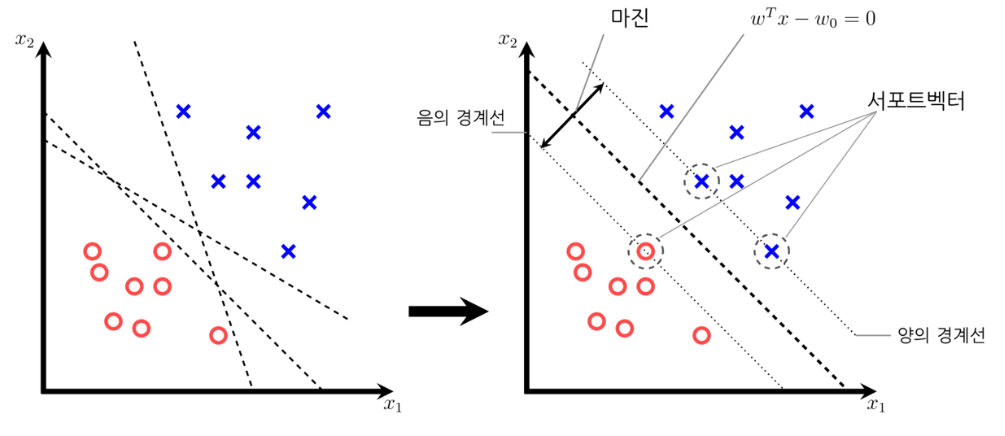
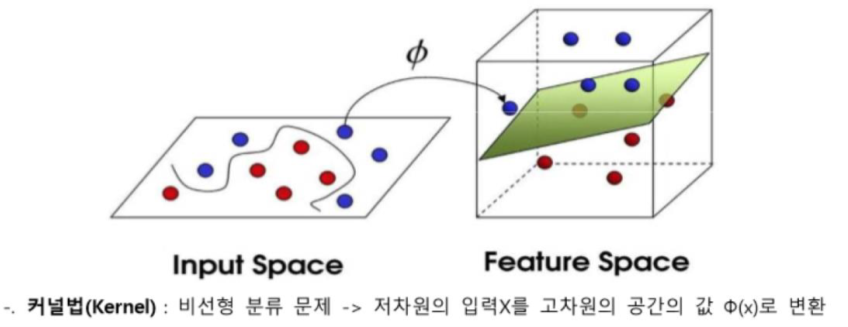

In [ ]:
from sklearn.svm import SVC, LinearSVC
# 모델 생성

# 모델 학습

# 모델 성능 평가


### 퍼셉트론 모델 (인공신경망)
* 인간신경세포 모방, 뉴런들의 상호작용과 경험을 통해 배우는 활동을 반복적인 학습 과정으로 모형화한 학습 기법
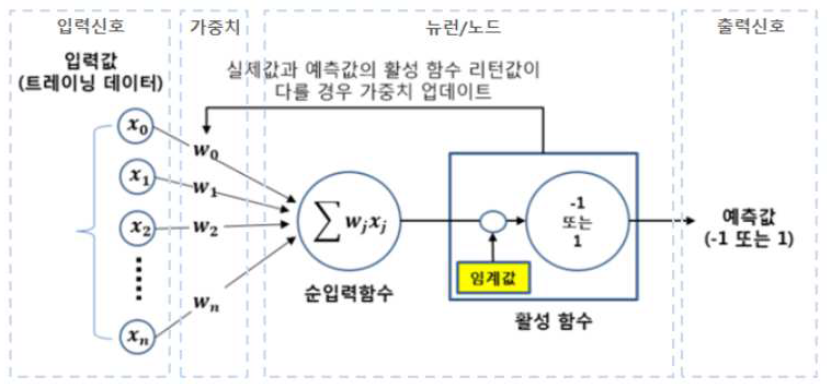

In [ ]:
from sklearn.linear_model import Perceptron
# 모델 생성

# 모델 학습

# 모델 성능 평가


## 3. 머신러닝별 정확도 비교